<a href="https://colab.research.google.com/github/eringcox/housing_data/blob/master/California_housing_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the California Housing dataset. 


In [1]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib


HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()


In [2]:
#see what the column names look like...printing out the first ten lines
#data is from 1990 and is using blocks, not single houses
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
#shows us rows x columns
housing.shape

(20640, 10)

In [4]:
#descriptive statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

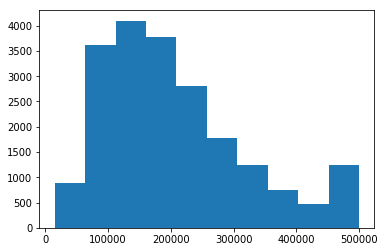

In [6]:
#plot histogram of the median house value
plt.hist(housing['median_house_value'])

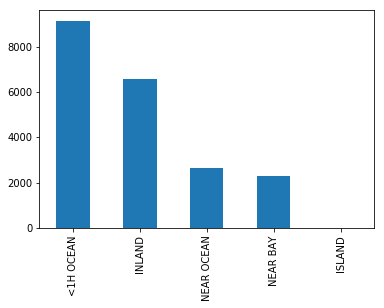

In [7]:
#plot a bar graph using pandas with number of counts in each category
housing['ocean_proximity'].value_counts().plot(kind='bar')

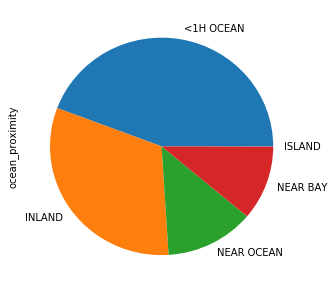

In [8]:
#make a pie chart of ocean proximity
housing['ocean_proximity'].value_counts().plot(kind='pie',figsize=(5,5))

In [31]:
#print(housing[housing['ocean_proximity']=='NEAR BAY'].count().unique())
#print(housing['ocean_proximity'].groupby(housing['ocean_proximity']=='NEAR BAY').count())

housing.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [32]:
#the percentages of each housing type
total = 20640

h_ocean = 9136/total
inland = 6551/total
n_ocean = 2658/total
n_bay = 2290/total
island = 5/total


print(h_ocean)
print(inland)
print(n_ocean)
print(n_bay)
print(island)

0.44263565891472867
0.31739341085271316
0.12877906976744186
0.11094961240310078
0.00024224806201550387


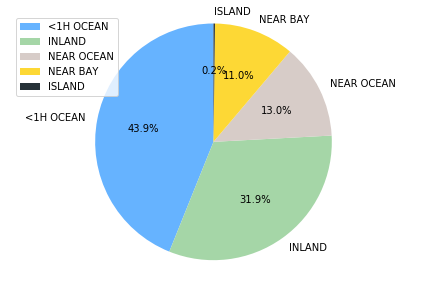

In [34]:
# Pie chart
labels = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
# Get sizes from output above
sizes = [44, 32, 13, 11, 0.2]
#colors
colors = ['#66b3ff','#A5D6A7', '#D7CCC8', '#FDD835', '#263238']

#used subplots for the legend
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(loc = 'upper left')
plt.show()

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

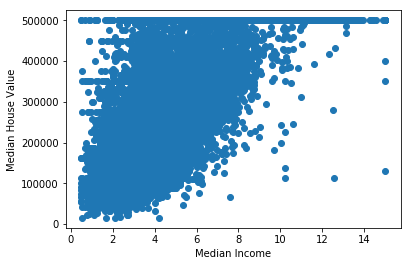

In [35]:
#x,y for scatter plot
plt.scatter(housing['median_income'],housing['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

#column heads and looking at similarities between features in descending
#sometimes will want to use absolute values for correlation
housing.corr()['median_house_value'].sort_values(ascending = False)

Let's  move on to another type of plot that is useful for showing correlations. We would expect to see a correlation between the income and the house value, as more income would most likely mean a nicer home.

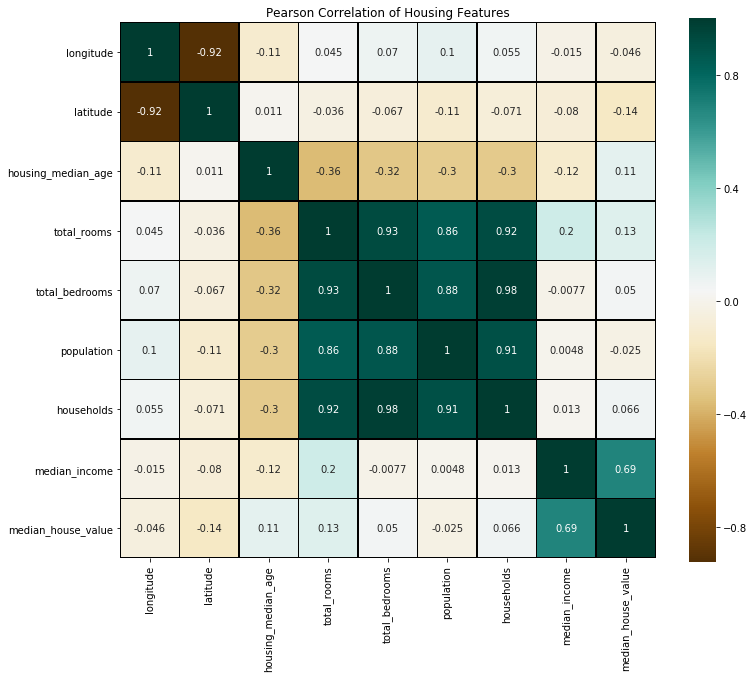

In [36]:
#to visualize correlations
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Housing Features')

# Draw the heatmap using seaborn
#annot = True puts the numbers on the colorbar
# Plotting the correlation 
sns.heatmap(housing.corr(),linewidths=0.25, square=True, cmap = "BrBG", linecolor='black', annot=True)

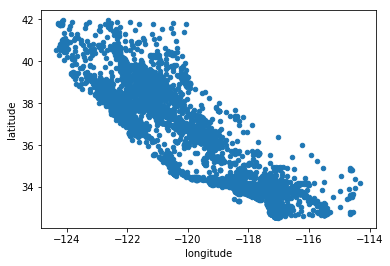

In [37]:
#using matplotlib
housing.plot(kind = 'scatter', x='longitude',y='latitude')

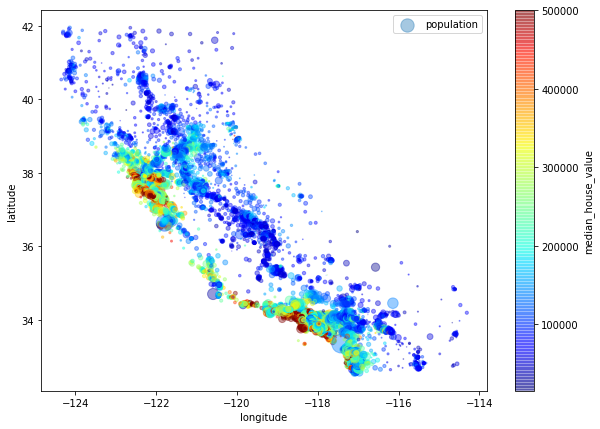

In [38]:
# let's make a more descriptive plot
# alpha is opacity
# s makes the dots bigger based on population for this plot
# c is giving the values of the homes (colors)
housing.plot(kind='scatter', x='longitude',y='latitude',
            alpha=0.4, s= housing['population']/100,
            label='population', figsize=(10,7),
            c = 'median_house_value',
            cmap = plt.get_cmap('jet'), colorbar= True)
plt.legend()

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


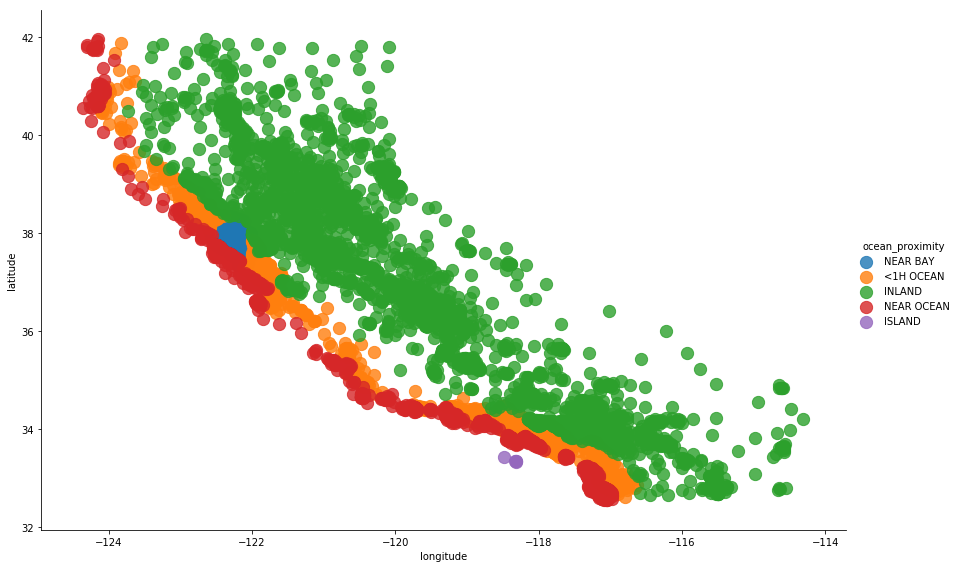

In [39]:
#looking at values of homes by proximity
ocean_proximity_graph = sns.lmplot(data=housing,
                                  x='longitude', y='latitude',
                                  fit_reg=False, hue='ocean_proximity',
                                  size=8, aspect=1.5, scatter_kws={'s':150})